In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

## Part 1

In [46]:
fmask  = 'states*.csv'

In [47]:
us_census = pd.concat([pd.read_csv(f,index_col=0) for f in glob.glob(fmask)])

In [48]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [49]:
def updateDf(r):
    pop = r['GenderPop']
    try:
        r['M'] = int(pop[:pop.find('M')])
    except:
        r['M'] = 0
    try:
        r['F'] = int(pop[pop.find('_')+1:pop.find('F')])
    except:
        r['F'] = 0
    r['Income'] = float(r['Income'][1:])
    r['Hispanic'] = float(r['Hispanic'][:-1])
    r['White'] = float(r['White'][:-1])
    r['Black'] = float(r['Black'][:-1])
    r['Native'] = float(r['Native'][:-1])
    r['Asian'] = float(r['Asian'][:-1])
    return r

In [50]:
us_census = us_census.apply(updateDf,axis=1)

In [52]:
us_census.F = us_census.TotalPop - us_census.M

In [53]:
income = us_census.Income

In [54]:
womenProp = us_census.F / us_census.TotalPop

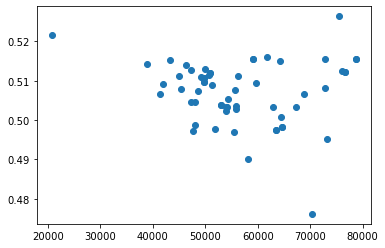

In [55]:
plt.scatter(income,womenProp)

In [60]:
us_census.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [66]:
us_census = us_census.drop_duplicates()

In [68]:
income = us_census.Income
womenProp = us_census.F / us_census.TotalPop

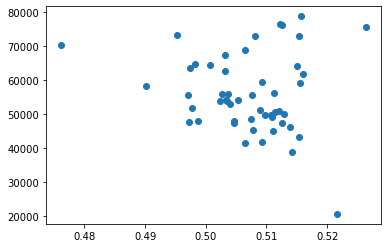

In [69]:
plt.scatter(womenProp,income)

## Part 2

In [70]:
inventory = pd.read_csv('inventory.csv')

In [71]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [72]:
staten_island = inventory[:10].copy()

In [73]:
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [75]:
product_request = staten_island.product_description

In [80]:
seed_request = inventory.where((inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds'))

In [81]:
inventory['in_stock'] = inventory.quantity > 0

In [83]:
inventory['total_value'] = inventory.price * inventory.quantity

In [84]:
from script import combine_lambda

In [86]:
inventory['full_description'] = inventory.apply(combine_lambda,axis=1)

In [87]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
